In [55]:
#1.1
import pandas as pd
WeatherData = pd.read_pickle("./weather-denmark.pkl")
df = WeatherData
#df.set_index('City')
df

Temp  Pressure  WindSpeed  WindDir
City     DateTime                                               
Aalborg  1980-03-01 00:00:00   5.0    1008.1       11.3    290.0
         1980-03-01 00:20:00   4.0       NaN        9.2    270.0
         1980-03-01 00:50:00   4.0       NaN        9.2    280.0
         1980-03-01 01:20:00   4.0       NaN        9.2    280.0
         1980-03-01 01:50:00   4.0       NaN        8.7    270.0
...                            ...       ...        ...      ...
Roskilde 2018-03-01 22:20:00  -5.0       NaN        5.1     70.0
         2018-03-01 22:50:00  -5.0       NaN        4.1     70.0
         2018-03-01 23:00:00  -5.3    1018.6        4.1     60.0
         2018-03-01 23:20:00  -5.0       NaN        3.6     60.0
         2018-03-01 23:50:00  -5.0       NaN        3.6     60.0

[2918150 rows x 4 columns]

In [58]:
#1.2

                     Temp  Pressure  WindSpeed  WindDir
DateTime                                               
1980-03-01 00:00:00   3.0    1008.9        6.2    260.0
1980-03-01 01:00:00   3.0       NaN        7.2    260.0
1980-03-01 02:00:00   4.0       NaN        8.7    270.0
1980-03-01 02:55:00   4.0       NaN       11.3    270.0
1980-03-01 03:00:00   4.0    1006.5       11.3    270.0
...                   ...       ...        ...      ...
2018-03-01 22:20:00  -3.0       NaN        9.3     80.0
2018-03-01 22:50:00  -3.0       NaN        9.3     90.0
2018-03-01 23:00:00  -3.4    1021.0        7.7     80.0
2018-03-01 23:20:00  -3.0       NaN        8.8     80.0
2018-03-01 23:50:00  -3.0       NaN        7.7     70.0

[717417 rows x 4 columns]


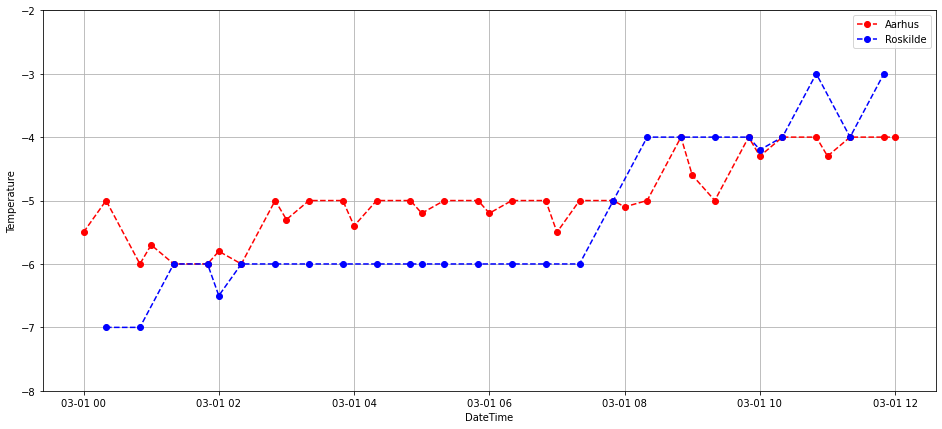

In [62]:
import matplotlib.pyplot as plt
cities = ['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde']


city_1 = df.xs(cities[1])
#city_1 = df.xs(cities[1],axis = 1)
print(city_1)
city_2 = df.xs(cities[2])


plt.figure(figsize=(16, 7))
plt.plot(city_1.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Aarhus', linestyle='--', marker='o',  c='r')

plt.plot(city_2.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Roskilde', linestyle='--', marker='o',  c='b')

plt.xlabel('DateTime')
plt.ylabel('Temperature')

plt.ylim([-8, -2])
plt.grid()
plt.legend()
plt.show()

In [78]:
def _resample(df):

    # Upsample in order to have data for every minute.
    df_res = df.resample('1T')

    # Interpolate through time
    df_res = df_res.interpolate(method='time')

    # Downsample to a 1-hour basis (60 minutes).
    df_res = df_res.resample('60T')

    df_res = df_res.interpolate()

    # We can remove all empty rows or leave like this for missing values analysis?
#     df_res = df_res.dropna(how='all')

    return df_res


def load_resampled_data():

    # Path for the cache-file with the resampled data.
    path = path_resampled_data_pickle()

    # Check if the cache-file already exists and load it eventually
    if os.path.exists(path):
        df = pd.read_pickle(path)
    else:
        # Otherwise resample the original data and save it in a cache-file.

        # Load the original data.
        #df_org = load_original_data()
        df_org = pd.read_pickle("./weather-denmark.pkl")
        # Split the original data into separate DataFrames for each city.
        df_cities = [df_org.xs(city) for city in cities]

        # Resample the data for each city.
        df_resampled = [_resample(df_city) for df_city in df_cities]

        # Join the resampled data into a single data-frame.
        df = pd.concat(df_resampled, keys=cities, axis=1, join='inner')

        # Save the resampled data in a cache-file for quick reloading.
        df.to_pickle(path)

    return df

In [79]:
import os
def path_resampled_data_pickle():
    return "./weather-denmark-resampled.pkl"

df_resampled = load_resampled_data()
df_resampled

Aalborg                                     Aarhus  \
                         Temp     Pressure  WindSpeed     WindDir   Temp   
DateTime                                                                   
1980-03-01 10:00:00  4.333333  1007.533333  11.266667  286.666667    4.0   
1980-03-01 11:00:00  5.000000  1007.766667  10.200000  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000  10.300000  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667   9.700000  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333  11.100000  283.333333    5.0   
...                       ...          ...        ...         ...    ...   
2018-03-01 19:00:00 -4.400000  1024.200000   7.200000   70.000000   -3.6   
2018-03-01 20:00:00 -4.300000  1023.700000   6.700000   70.000000   -3.9   
2018-03-01 21:00:00 -3.900000  1023.100000   8.800000   80.000000   -3.5   
2018-03-01 22:00:00 -3.800000  1022.900000   7.200000   70.000000   -3.5   
2018-03-01 23:00:00 -4.200000  1022.500000   7.200000   70.000000   -3.4   

                                                     Esbjerg           \
                        Pressure WindSpeed WindDir      Temp Pressure   
DateTime                                                                
1980-03-01 10:00:00  1008.000000      14.9   290.0       NaN      NaN   
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333      NaN   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333      NaN   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889      NaN   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222      NaN   
...                          ...       ...     ...       ...      ...   
2018-03-01 19:00:00  1022.700000       8.8    70.0 -5.000000   1022.6   
2018-03-01 20:00:00  1022.200000       8.2    60.0 -4.333333   1022.6   
2018-03-01 21:00:00  1021.700000       8.2    80.0 -5.000000   1022.6   
2018-03-01 22:00:00  1021.200000       8.2    80.0 -5.000000   1022.6   
2018-03-01 23:00:00  1021.000000       7.7    80.0 -5.333333   1022.6   

                                              Odense                          \
                     WindSpeed     WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                       
1980-03-01 10:00:00        NaN         NaN  5.545455  1010.933333  11.663636   
1980-03-01 11:00:00  12.383333  310.000000  6.142857  1011.066667  12.585714   
1980-03-01 12:00:00  12.883333  310.000000  7.000000  1011.200000  11.300000   
1980-03-01 13:00:00  13.244444  309.444444  7.000000  1011.300000  12.118182   
1980-03-01 14:00:00  12.911111  306.111111  6.857143  1011.400000  12.742857   
...                        ...         ...       ...          ...        ...   
2018-03-01 19:00:00   6.366667   70.000000 -4.400000  1020.400000   8.800000   
2018-03-01 20:00:00   6.866667   80.000000 -5.000000  1019.800000   8.200000   
2018-03-01 21:00:00   8.200000   80.000000 -5.200000  1019.200000   7.700000   
2018-03-01 22:00:00   6.366667   66.666667 -5.000000  1018.700000   8.800000   
2018-03-01 23:00:00   6.533333   60.000000 -4.700000  1018.300000   9.300000   

                                 Roskilde                                  
                        WindDir      Temp Pressure  WindSpeed     WindDir  
DateTime                                                                   
1980-03-01 10:00:00  285.454545       NaN      NaN        NaN         NaN  
1980-03-01 11:00:00  290.000000  5.000000      NaN  11.466667  280.000000  
1980-03-01 12:00:00  290.000000  5.000000      NaN  12.466667  280.000000  
1980-03-01 13:00:00  290.000000  5.166667      NaN  13.133333  278.333333  
1980-03-01 14:00:00  290.000000  5.833333      NaN  12.300000  270.000000  
...                         ...       ...      ...        ...         ...  
2018-03-01 19:00:00   60.000000 -4.400000   1020.6   6.200000   60.000000  
2018-03-01 20:00:00   60.000000 -4.600000   1019.9   

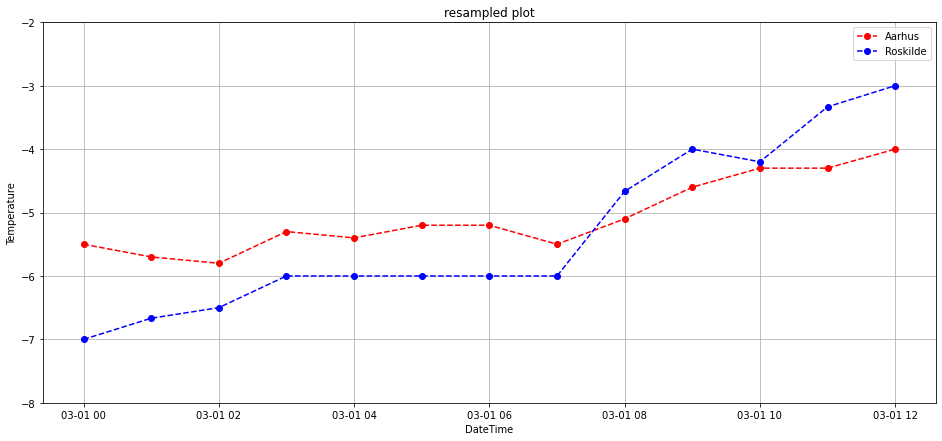

In [86]:
city_1 = df_resampled.loc[slice(None),cities[1]]
city_2 = df_resampled.loc[slice(None),cities[2]]

plt.figure(figsize=(16, 7))
plt.plot(city_1.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Aarhus', linestyle='--', marker='o',  c='r')

plt.plot(city_2.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Roskilde', linestyle='--', marker='o',  c='b')

plt.xlabel('DateTime')
plt.ylabel('Temperature')

plt.ylim([-8, -2])
plt.title('resampled plot')
plt.grid()
plt.legend()
plt.show()

In [89]:
print(city_1)

                     Temp     Pressure  WindSpeed  WindDir
DateTime                                                  
1980-03-01 10:00:00   4.0  1008.000000       14.9    290.0
1980-03-01 11:00:00   5.0  1008.300000       15.4    290.0
1980-03-01 12:00:00   5.0  1008.600000       13.4    280.0
1980-03-01 13:00:00   5.0  1008.433333       15.4    280.0
1980-03-01 14:00:00   5.0  1008.266667       14.9    300.0
...                   ...          ...        ...      ...
2018-03-01 19:00:00  -3.6  1022.700000        8.8     70.0
2018-03-01 20:00:00  -3.9  1022.200000        8.2     60.0
2018-03-01 21:00:00  -3.5  1021.700000        8.2     80.0
2018-03-01 22:00:00  -3.5  1021.200000        8.2     80.0
2018-03-01 23:00:00  -3.4  1021.000000        7.7     80.0

[333110 rows x 4 columns]


In [87]:
#1.3

In [88]:

###########################
# Task: 
#   extract general statistical properties
#
###########################

df_resampled.describe()


#########

Aalborg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.323675    1012.743473       4.867406     192.307074   
std         6.986639      11.690186       2.793941      88.071567   
min       -25.000000     951.900000       0.000000      10.000000   
25%         3.100000    1005.700000       2.666667     116.666667   
50%         8.100000    1013.400000       4.600000     210.000000   
75%        13.600000    1020.500000       6.700000     260.000000   
max        30.800000    1050.800000      32.900000     360.000000   

              Aarhus                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.290577    1013.352071       4.036376     201.261096   
std         7.027572      11.277480       2.549404      82.166840   
min       -24.300000     955.500000       0.000000      10.000000   
25%         3.000000    1006.600000       2.100000     140.000000   
50%         8.000000    1014.000000       3.600000     213.333333   
75%        13.500000    1020.800000       5.600000     270.000000   
max        30.900000    1050.000000      33.400000     360.000000   

             Esbjerg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333109.000000  332070.000000  333109.000000  333109.000000   
mean        8.537116    1013.131439       4.892615     201.758338   
std         6.743867      10.904699       2.681328      87.880378   
min       -27.000000     959.300000       0.000000      10.000000   
25%         4.000000    1006.954601       2.933333     126.666667   
50%         8.333333    1014.127073       4.516667     216.666667   
75%        13.582857    1019.861904       6.533333     273.703704   
max        54.000000    1049.300000      39.100000     360.000000   

              Odense                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.802755    1013.805596       4.848788     195.840053   
std         6.924723      10.958942       2.768103      83.739036   
min       -22.500000     959.700000       0.000000      10.000000   
25%         3.700000    1007.300000       2.766667     126.666667   
50%         8.600000    1014.433333       4.600000     210.000000   
75%        13.950000    1021.000000       6.635696     260.000000   
max        49.900000    1048.900000      62.521795     360.000000   

            Roskilde                                               
                Temp       Pressure      WindSpeed        WindDir  
count  333109.000000  332346.000000  333109.000000  333109.000000  
mean        8.264180    1012.839357       4.835396     202.708912  
std         7.124592      11.739851       2.755634      86.188538  
min       -21.833333     959.800000       0.000000      10.000000  
25%         3.000000    1006.100000       2.766667     130.000000  
50%         8.000000    1013.833333       4.433333     220.000000  
75%        13.700000    1020.700000       6.574359     270.000000  
max        32.000000    1048.100000      25.000000     360.000000

In [107]:
###########################
# Task: 
#   plot average temperature in January from 1980 to 2018.
#
###########################

datetime = []
rg = pd.date_range('1980-01-01', periods=744, freq='60T')
for i in range(38):
    rg = rg + pd.offsets.YearBegin()
    rg1ist = list(rg) 
    datetime.extend(rg1ist)

df_J = df_resampled.loc[datetime]
df_J

Aalborg                               Aarhus              \
                       Temp    Pressure WindSpeed WindDir   Temp    Pressure   
DateTime                                                                       
1981-01-01 00:00:00     2.0  987.600000       6.6   270.0    1.0  990.200000   
1981-01-01 01:00:00     2.0  987.300000       9.2   270.0    1.0  990.066667   
1981-01-01 02:00:00     2.0  987.000000       8.7   250.0    0.5  989.933333   
1981-01-01 03:00:00     2.0  986.700000       8.2   260.0    0.0  989.800000   
1981-01-01 04:00:00     2.0  986.433333       9.2   280.0    0.0  989.533333   
...                     ...         ...       ...     ...    ...         ...   
2018-01-01 19:00:00     4.6  990.100000       5.1   200.0    5.0  992.700000   
2018-01-01 20:00:00     4.8  990.500000       6.2   210.0    5.0  993.200000   
2018-01-01 21:00:00     5.3  990.900000       6.7   220.0    5.1  993.700000   
2018-01-01 22:00:00     5.4  991.500000       7.2   230.0    5.1  994.300000   
2018-01-01 23:00:00     5.1  992.200000       6.7   240.0    5.2  994.800000   

                                        Esbjerg                          \
                    WindSpeed WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                  
1981-01-01 00:00:00       7.2   260.0  4.277778  1010.400000  12.800000   
1981-01-01 01:00:00       8.2   270.0  3.944444  1010.300000  12.800000   
1981-01-01 02:00:00       6.1   280.0  3.611111  1010.200000  12.800000   
1981-01-01 03:00:00       5.1   270.0  3.277778  1010.100000  12.800000   
1981-01-01 04:00:00       8.2   270.0  2.944444  1010.000000  12.800000   
...                       ...     ...       ...          ...        ...   
2018-01-01 19:00:00       3.1   220.0  5.333333  1009.878924   4.766667   
2018-01-01 20:00:00       2.6   230.0  5.333333  1009.885800   4.600000   
2018-01-01 21:00:00       3.1   230.0  5.666667  1009.892676   4.966667   
2018-01-01 22:00:00       3.1   220.0  5.000000  1009.899552   4.300000   
2018-01-01 23:00:00       3.6   230.0  5.000000  1009.906428   4.100000   

                                Odense                                 \
                        WindDir   Temp    Pressure  WindSpeed WindDir   
DateTime                                                                
1981-01-01 00:00:00  271.777778  5.775  996.985714  13.565833  262.25   
1981-01-01 01:00:00  274.444444  5.625  996.628571  13.720833  263.75   
1981-01-01 02:00:00  277.111111  5.475  996.271429  13.875833  265.25   
1981-01-01 03:00:00  279.777778  5.325  995.914286  14.030833  266.75   
1981-01-01 04:00:00  282.444444  5.175  995.557143  14.185833  268.25   
...                         ...    ...         ...        ...     ...   
2018-01-01 19:00:00  223.333333  4.600  994.600000   6.200000  210.00   
2018-01-01 20:00:00  220.000000  4.600  994.900000   6.700000  210.00   
2018-01-01 21:00:00  233.333333  4.300  995.400000   5.100000  210.00   
2018-01-01 22:00:00  243.333333  4.400  995.900000   4.600000  210.00   
2018-01-01 23:00:00  233.333333  4.100  996.400000   4.100000  210.00   

                     Roskilde                                     
                         Temp     Pressure WindSpeed     WindDir  
DateTime                                                          
1981-01-01 00:00:00  6.777778  1013.273267      11.3  237.111111  
1981-01-01 01:00:00  6.644444  1013.301980      11.3  238.977778  
1981-01-01 02:00:00  6.511111  1013.330693      11.3  240.844444  
1981-01-01 03:00:00  6.377778  1013.359406      11.3  242.711111  
1981-01-01 04:00:00  6.244444  1013.388119      11.3  244.577778  
...                       ...          ...       ...         ...  
2018-01-01 19:00:00  4.700000   994.900000       6.2  220.000000  
2018-01-01 20:00:00  4.600000   995.400000       6.7  220.000000  
2018-01-01 21:00:00  4.500000   995.800000       5.1  220.000000  
2018-01-01 22:00:00  

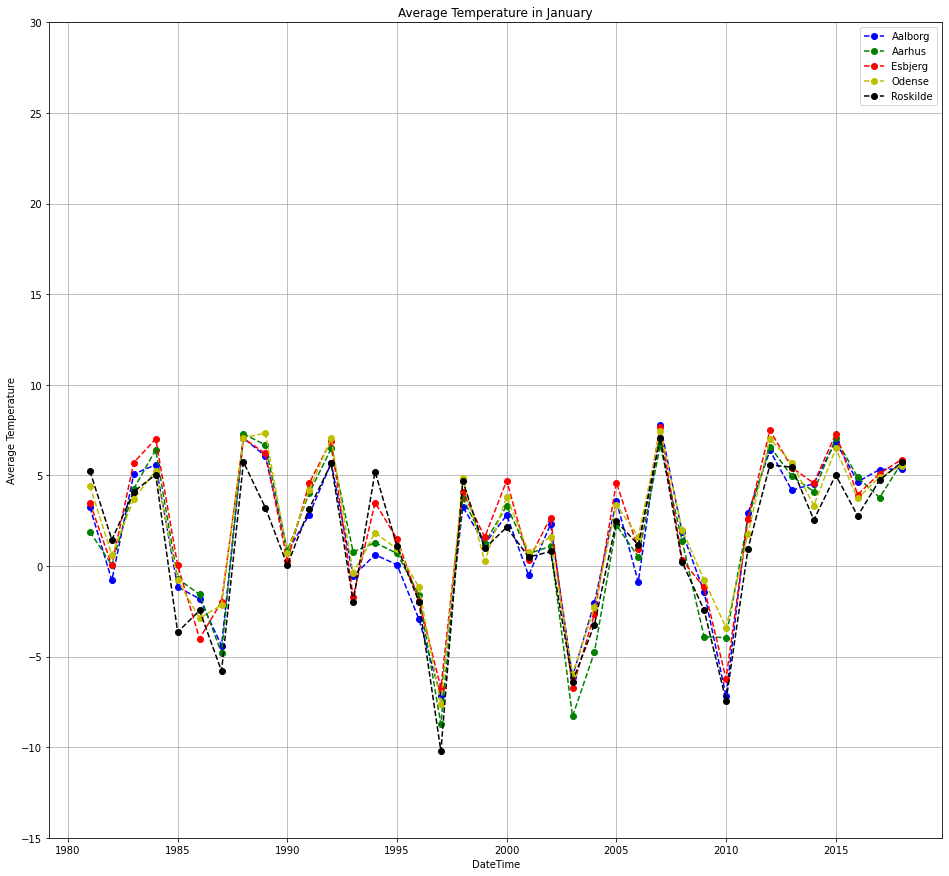

In [470]:
import numpy as np
color = ['b', 'g', 'r', 'y', 'k']
plt.figure(figsize=(16, 15))
for i,city in enumerate(cities):
    temp = []
    mon = pd.date_range('1980-01-01', periods=744, freq='60T')
    for j in range(38):
        mon = mon + pd.offsets.YearBegin()
        monl = list(mon)
        m = df_J.loc[mon, (city,'Temp')].mean()
        temp.append(m)
    
    #plt.figure(figsize=(16, 15))
    #plt.subplot(5,1,i+1)
    t = np.linspace(1981,2018,38)
    plt.plot(t,temp,label=city, linestyle='--', marker='o',  c=color[i])

    plt.xlabel('DateTime')
    plt.ylabel('Average Temperature')

    plt.ylim([-15, 30])
    plt.title('Average Temperature in January')
    plt.grid()
    plt.legend()
plt.show()
#########

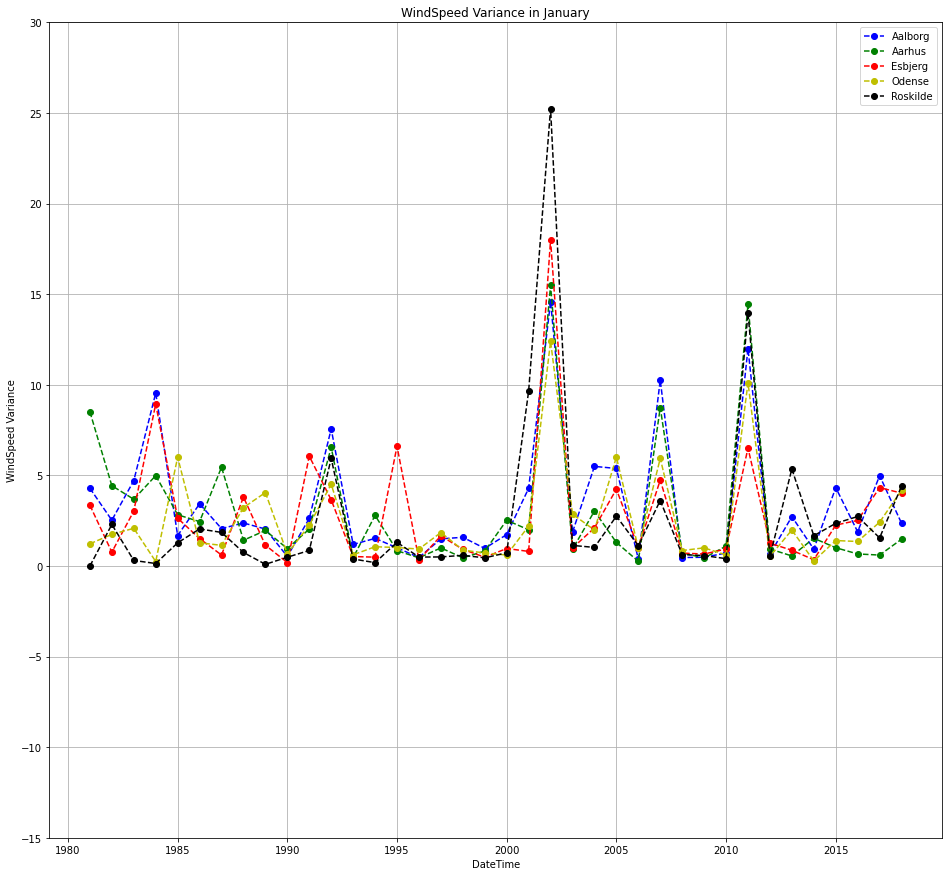

In [472]:
###########################
# Task: 
#   plot average wind speed variance in January from 1980 to 2018.
#
###########################
import numpy as np
plt.figure(figsize=(16, 15))
for i,city in enumerate(cities):
    winds = []
    mon = pd.date_range('1980-01-01', periods=744, freq='60T')
    for j in range(38):
        mon = mon + pd.offsets.YearBegin()
        monl = list(mon)
        v = df_J.loc[mon, (city,'WindSpeed')].var()
        winds.append(v)
    
    
    t = np.linspace(1981,2018,38)
    plt.plot(t,winds,label=city, linestyle='--', marker='o',  c=color[i])

    plt.xlabel('DateTime')
    plt.ylabel('WindSpeed Variance')

    plt.ylim([-15, 30])
    plt.title('WindSpeed Variance in January')
    plt.grid()
    plt.legend()
plt.show()
#########

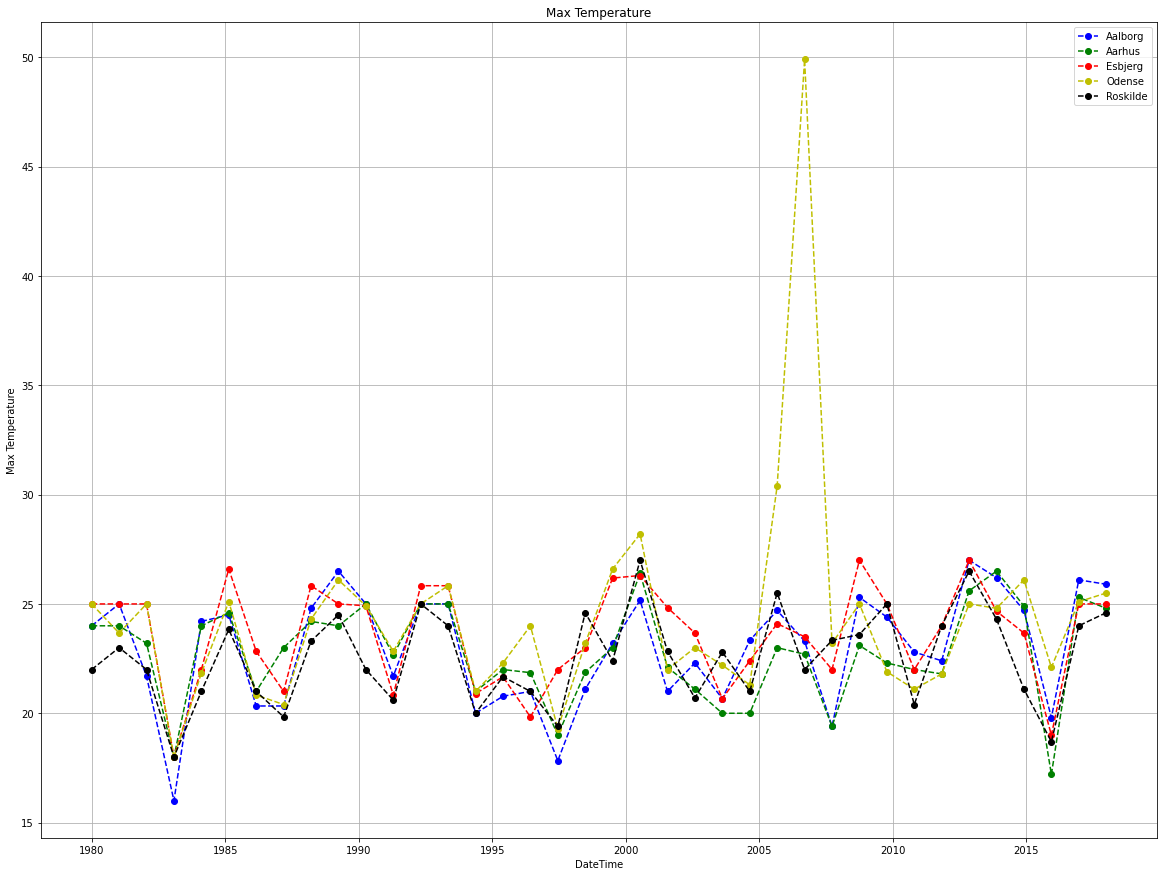

In [213]:
###########################
# Task: 
#   plot maximum temperature in May from 1980 to 2018.
#
###########################

import numpy as np
color = ['b', 'g', 'r', 'y', 'k']
plt.figure(figsize=(20, 15))
for i,city in enumerate(cities):
    temp_m = []
    
    mon1 = pd.date_range('1979-05-01', periods=744, freq='60T')
    for j in range(38):
        mon1 = mon1 + pd.DateOffset(months = 12)
        #mon_M = list(mon_M)
        m = df_resampled.loc[mon1, (city,'Temp')].max()
        temp_m.append(m)
    
    #plt.figure(figsize=(50, 15))
    #plt.subplot(5,1,i+1)
    t = np.linspace(1980,2018,38)
    plt.plot(t,temp_m,label= city , linestyle='--', marker='o',  c=color[i])

    plt.xlabel('DateTime')
    plt.ylabel('Max Temperature')

    #plt.ylim([15, 40])
    plt.title('Max Temperature')
    plt.grid()
    plt.legend()
plt.show()  


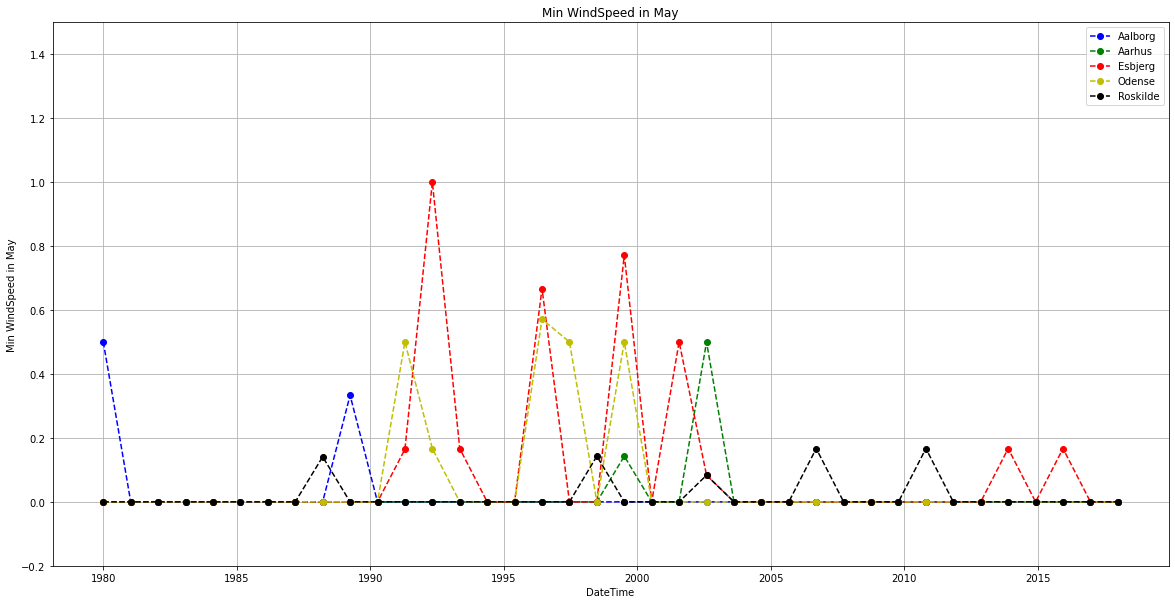

In [214]:
###########################
# Task: 
#   plot minimum wind speed in May from 1980 to 2018.
#
###########################
import numpy as np
plt.figure(figsize=(20, 10))
for i,city in enumerate(cities):
    wind_m = []
    
    mon1 = pd.date_range('1979-05-01', periods=744, freq='60T')
    for j in range(38):
        mon1 = mon1 + pd.DateOffset(months = 12)
        #mon_M = list(mon_M)
        w = df_resampled.loc[mon1,(city,'WindSpeed')].min()
        wind_m.append(w)
    
    
    t = np.linspace(1980,2018,38)
    plt.plot(t,wind_m,label=city, linestyle='--', marker='o',  c=color[i])
    plt.xlabel('DateTime')
    plt.ylabel('Min WindSpeed in May')

    plt.ylim([-0.2, 1.5])
    plt.title('Min WindSpeed in May')
    plt.grid()
    plt.legend()
plt.show()







In [161]:
#1.4

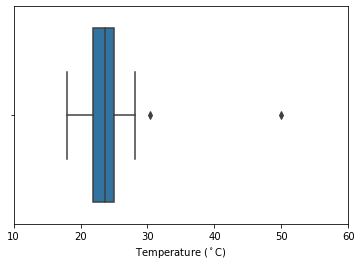

In [354]:
may_max_temp_3 = []
time_range = pd.date_range('1979-05-01', periods=744, freq='60T')
mon_M_3 = time_range
for i in range(38):
    mon_M_3 = mon_M_3 + pd.DateOffset(months = 12)
    #mon_M_3 = list(mon_M_3)
    m = df_resampled.loc[mon_M_3,(cities[3],'Temp')].max()
    may_max_temp_3.append(m)
year = np.linspace(1980,2018,38)

import seaborn as sns

# extract all the data except the last one because it is a NaN, which is missing value. 
# We will see shortly how to deal with missing value.

outlier_dataset = np.array(may_max_temp_3[:-1])
outlier_year = np.array(year[:-1])

# box plot
sns.boxplot(x = outlier_dataset)
plt.xlabel(r'Temperature ($^\circ$C)')
plt.xlim([10, 60])
plt.show()

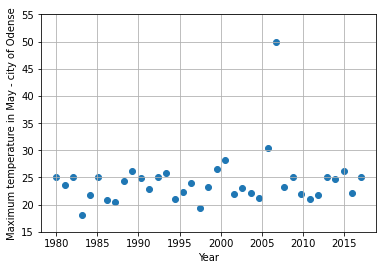

In [355]:
plt.scatter(outlier_year,outlier_dataset)
plt.xlabel('Year')
plt.ylabel('Maximum temperature in May - city of Odense')
plt.ylim([15, 55])
plt.grid()
plt.show()

In [356]:
#1.4.2

z score of the dataset is:
 [1.46904429e-01 1.24699013e-01 1.46904429e-01 1.27901364e+00
 4.98153745e-01 1.67274687e-01 7.01856326e-01 7.90127444e-01
 4.31262221e-03 3.70977268e-01 1.29929214e-01 2.94451163e-01
 1.46904429e-01 3.16656580e-01 6.67905896e-01 4.03092540e-01
 5.67981521e-02 1.01420028e+00 2.19760217e-01 4.72828559e-01
 7.98752689e-01 4.64203314e-01 2.60500733e-01 4.23462798e-01
 6.06795121e-01 1.24689837e+00 5.21909870e+00 2.19760217e-01
 1.46904429e-01 4.84573572e-01 6.47535637e-01 5.04943831e-01
 1.46904429e-01 1.06163913e-01 3.70977268e-01 4.43833056e-01
 1.67274687e-01]


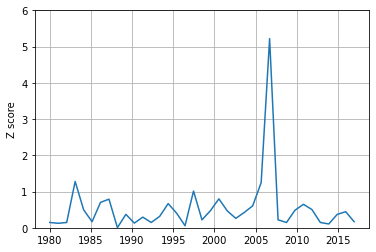

In [357]:
from scipy import stats
# calc the abs value of z-score
z = np.abs(stats.zscore(outlier_dataset))

print('z score of the dataset is:\r\n',z)

plt.plot(outlier_year,z)
plt.grid()
plt.ylim([0, 6])
plt.ylabel('Z score')
plt.show()

In [358]:
# set a threshold and find the location where the value meets our condition(s)
threshold = 3
outlier_loc = np.where(z > threshold)

# find the outlier value given its index
outlier_by_Z_Score = outlier_dataset[outlier_loc]
print('the data classified as outlier by z score:\r\n', outlier_by_Z_Score)
print('the year of the outlier is:\r\n', outlier_year[outlier_loc])

the data classified as outlier by z score:
 [49.9]
the year of the outlier is:
 [2006.7027027]


In [359]:
Q1 = np.quantile(outlier_dataset,0.25)
Q3 = np.quantile(outlier_dataset,0.75)
IQR = Q3-Q1
Minimum = Q1-1.5*IQR
Maximum = Q3+1.5*IQR

# find values that meets the conditions: (outlier_dataset<Minimum) or (outlier_dataset>Maximum)
outlier_by_IQR_Score=outlier_dataset[(outlier_dataset<Minimum) | (outlier_dataset>Maximum)]
print('The data classified as outlier by IQR score:\r\n', outlier_by_IQR_Score)

The data classified as outlier by IQR score:
 [30.4 49.9]


In [360]:
#1.4.3

Before Drop, the dataset has shape:
 (37,)
After Drop, the dataset has shape:
 (36,)


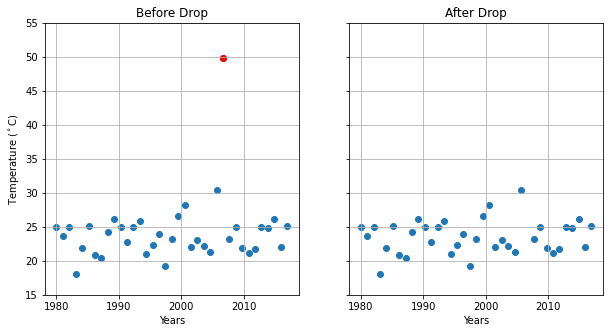

In [361]:
# find values that meet the conditions: outlier_dataset != outlier_by_Z_Score
# **NOTE** conditions like "array!=value" and  "array==value" only works 
# when value is a single value, not an array. The same mechanism for np.where(array==value).

dropped_outlier_dataset = outlier_dataset[outlier_dataset != outlier_by_Z_Score]

# do the same for year value
dropped_outlier_year = outlier_year[outlier_dataset != outlier_by_Z_Score]

print('Before Drop, the dataset has shape:\r\n', outlier_dataset.shape)
print('After Drop, the dataset has shape:\r\n', dropped_outlier_dataset.shape)

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before Drop')
ax1.scatter(outlier_year,outlier_dataset)
ax1.scatter(outlier_year[outlier_loc], outlier_dataset[outlier_loc], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After Drop')
ax2.scatter(dropped_outlier_year,dropped_outlier_dataset)
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

Before cap the outlier, its value:
 [49.9]
After cap the outlier, its value:
 [30.4]


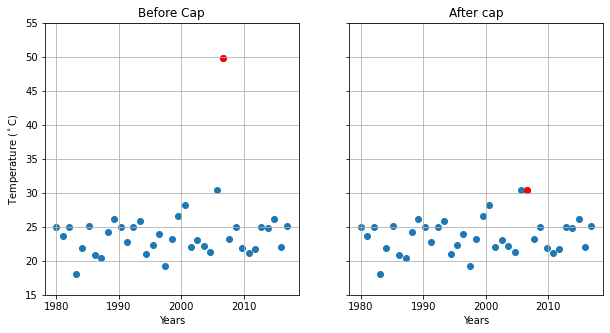

In [362]:
capped_outlier_dataset=np.copy(outlier_dataset)
print('Before cap the outlier, its value:\r\n',capped_outlier_dataset[outlier_loc])
# cap the outliers
capped_outlier_dataset[outlier_loc]=np.max(dropped_outlier_dataset)
print('After cap the outlier, its value:\r\n',capped_outlier_dataset[outlier_loc])

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before Cap')
ax1.scatter(outlier_year,outlier_dataset)
ax1.scatter(outlier_year[outlier_loc], outlier_dataset[outlier_loc], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After cap')
ax2.scatter(outlier_year,capped_outlier_dataset)
ax2.scatter(outlier_year[outlier_loc], capped_outlier_dataset[outlier_loc], c='r')
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

Before replacing, the outlier value is:
 [49.9]
After replacing, the outlier value predicted by a regression model is: 
 [23.807533]


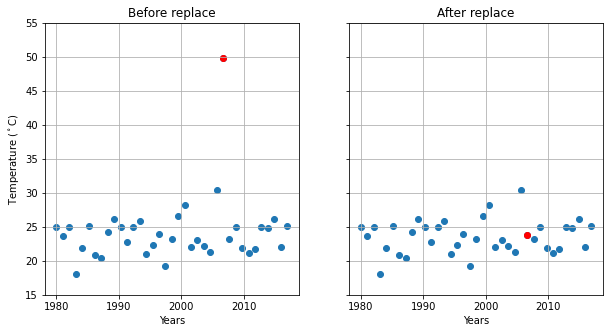

In [363]:

replaced_outlier_dataset = np.copy(outlier_dataset)
print('Before replacing, the outlier value is:\r\n',replaced_outlier_dataset[outlier_loc])

# find the coefficient of our linear model using clean data
z = np.polyfit(dropped_outlier_year,dropped_outlier_dataset, deg=1) # deg=1: use 1-order polynomial regression model
# define our linear model
pred_func = np.poly1d(z)
# predict the value of our outlier and replace it
pred_value = pred_func(outlier_year[outlier_loc])
replaced_outlier_dataset[outlier_loc]=pred_value
print('After replacing, the outlier value predicted by a regression model is: \r\n',replaced_outlier_dataset[outlier_loc])

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before replace')
ax1.scatter(outlier_year,outlier_dataset)
ax1.scatter(outlier_year[outlier_loc], outlier_dataset[outlier_loc], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After replace')
ax2.scatter(outlier_year,replaced_outlier_dataset)
ax2.scatter(outlier_year[outlier_loc], pred_value, c='r')
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

In [364]:
#To do

In [365]:
Q1 = np.quantile(outlier_dataset,0.25)
Q3 = np.quantile(outlier_dataset,0.75)
IQR = Q3-Q1
Minimum = Q1-1.5*IQR
Maximum = Q3+1.5*IQR
print(Minimum,Maximum)
# find values that meets the conditions: (outlier_dataset<Minimum) or (outlier_dataset>Maximum)
outlier_by_IQR_Score=outlier_dataset[(outlier_dataset<Minimum) | (outlier_dataset>Maximum)]
print('The data classified as outlier by IQR score:\r\n', outlier_by_IQR_Score)
#outlier_loc = np.where(outlier_dataset == outlier_by_IQR_Score)
outlier_loc = []
for i in range(len(outlier_by_IQR_Score)):
    outlier_loc.append(np.argwhere(outlier_dataset == outlier_by_IQR_Score[i]))

outlier_year = np.trunc(outlier_year)
outlier_y = []
for i in range(len(outlier_loc)):
        outlier_y.append(int(outlier_year[outlier_loc[i]]))
outlier_y
print('the year of the outlier is:\r\n',outlier_y)

17.249999999999996 29.650000000000002
The data classified as outlier by IQR score:
 [30.4 49.9]
the year of the outlier is:
 [2005, 2006]


In [372]:
# - use the temperature data for the months in which the outliers are found to predict and replace them.
outyear = []
temp_replace = []
for i in range(len(outlier_y)):
    outyear.append(pd.date_range('%d-05-01'% outlier_y[i], periods=744, freq='60T'))


for j in range(len(outyear)):
    #print(df_resampled.loc[outyear[j],(cities[3],'Temp')].sort_values())
    temp_sort = df_resampled.loc[outyear[j],(cities[3],'Temp')]
    temp_sort = temp_sort[(temp_sort>Minimum) & (temp_sort< Maximum)].values
    replace_value = temp_sort.max()
    temp_replace.append(replace_value)
    
temp_replace



[29.2, 29.227272727272727]

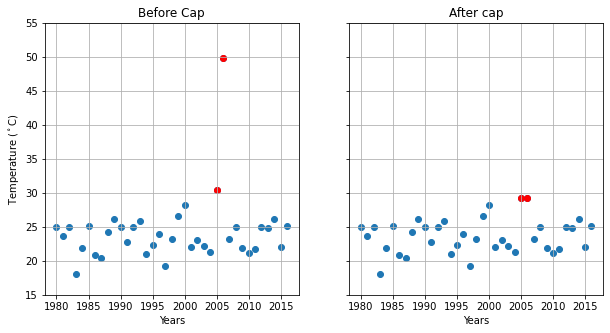

In [371]:
outlier_dataset = np.array(may_max_temp_3[:-1])
outlier_dataset_r = np.copy(outlier_dataset)
for i in range(len(outlier_loc)):
    outlier_dataset_r[outlier_loc[i]] = temp_replace[i]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before Cap')
ax1.scatter(outlier_year,outlier_dataset)
for i in range(len(outlier_loc)):
    ax1.scatter(outlier_year[outlier_loc[i]], outlier_dataset[outlier_loc[i]], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After cap')
ax2.scatter(outlier_year,outlier_dataset_r)
for i in range(len(outlier_loc)):
    ax2.scatter(outlier_year[outlier_loc[i]], outlier_dataset_r[outlier_loc[i]], c='r')
ax2.set_xlabel('Years')
ax2.grid()

plt.show()
##########################################################

In [379]:
dropped_outlier_dataset = np.copy(outlier_dataset)
dropped_outlier_year  = np.copy(outlier_year)
for i in range(len(outlier_loc)):
    dropped_outlier_year = dropped_outlier_year[dropped_outlier_dataset != outlier_by_IQR_Score[i]]
    dropped_outlier_dataset = dropped_outlier_dataset[dropped_outlier_dataset != outlier_by_IQR_Score[i]]

print(len(dropped_outlier_year))
print(len(dropped_outlier_dataset))

35
35


Before replacing, the outlier value is:
 [30.4 49.9]
After replacing, the outlier value predicted by a regression model is: 
 [array([[23.43731345]]), array([[23.46778845]])]


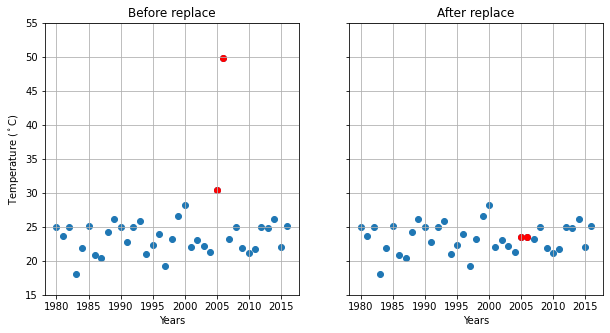

In [389]:
outlier_dataset = np.array(may_max_temp_3[:-1])
outlier_year = np.array(year[:-1])
outlier_year = np.trunc(outlier_year)
# - use a higher order polynomial (2nd or 3rd) to fit the data.
replaced_outlier_dataset_2nd = np.copy(outlier_dataset)
print('Before replacing, the outlier value is:\r\n',outlier_by_IQR_Score)

# find the coefficient of our linear model using clean data
z = np.polyfit(dropped_outlier_year,dropped_outlier_dataset, deg=2) # deg=1: use 1-order polynomial regression model
# define our linear model
pred_func = np.poly1d(z)

# predict the value of our outlier and replace it
pred_value = []

for i in range(len(outlier_loc)):
    pred_value.append(pred_func(outlier_year[outlier_loc[i]]))
    replaced_outlier_dataset_2nd[outlier_loc[i]] = pred_value[i]
print('After replacing, the outlier value predicted by a regression model is: \r\n',pred_value )

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before replace')
ax1.scatter(outlier_year,outlier_dataset)
for i in range(len(outlier_loc)):
    ax1.scatter(outlier_year[outlier_loc[i]], outlier_dataset[outlier_loc[i]], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After replace')
ax2.scatter(outlier_year,replaced_outlier_dataset_2nd)
for i in range(len(outlier_loc)):
    ax2.scatter(outlier_year[outlier_loc[i]], pred_value[i], c='r')
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

In [390]:
#1.5 Missing Data

In [393]:
num = df_resampled.isna().sum()
print(num)

Aalborg   Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Aarhus    Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Esbjerg   Temp            1
          Pressure     1040
          WindSpeed       1
          WindDir         1
Odense    Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Roskilde  Temp            1
          Pressure      764
          WindSpeed       1
          WindDir         1
dtype: int64


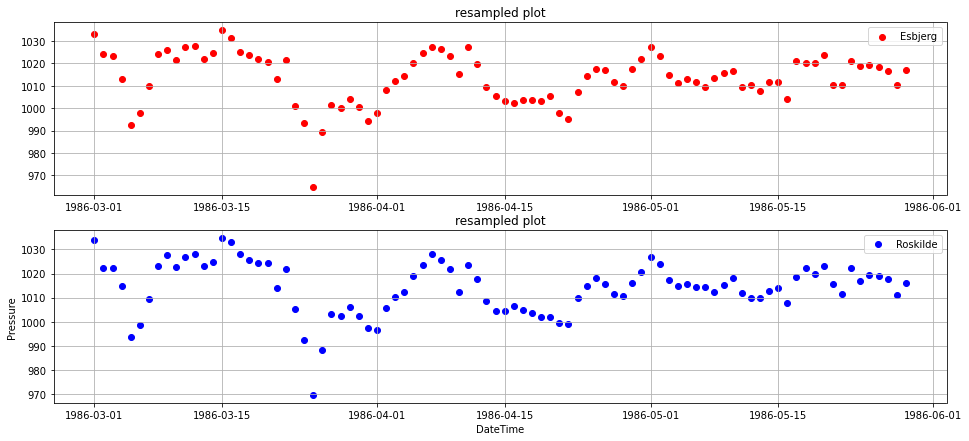

In [405]:
tr = pd.date_range('1986-03-01', periods=90, freq='1D')
city_e = df_resampled.loc[slice(None),cities[2]]
city_r = df_resampled.loc[slice(None),cities[4]]

plt.figure(figsize=(16, 7))
plt.subplot(2,1,1)
plt.scatter(tr,city_e.loc[tr, 'Pressure'],label='Esbjerg',c='r')
plt.title('resampled plot')
plt.grid()
plt.legend()
plt.subplot(2,1,2)
plt.scatter(tr, city_r.loc[tr, 'Pressure'],
         label='Roskilde', c='b')

plt.xlabel('DateTime')
plt.ylabel('Pressure')

#plt.ylim([-8, -2])
plt.title('resampled plot')
plt.grid()
plt.legend()
plt.show()

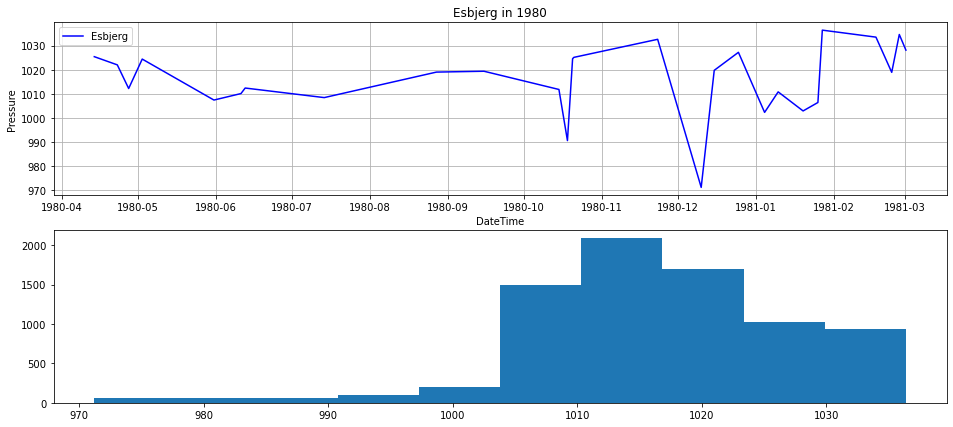

In [455]:
## [TO DO (1)] choose one year with many interpolated values, plot it and make an histogram of the distribution
# TO BE COMPLETED

# The following processing is based on the data from Esbjerg
city_e = df_resampled.loc[slice(None),cities[2]]
tr = pd.date_range('1980-03-01 10:00:00', periods=8760, freq='60T')

nayear = []
for j in range(37):
    na_val = city_e.loc[tr,'Pressure'].isna().sum()
    nayear.append(na_val)
    tr = tr + pd.DateOffset(months = 12)

nayear
# identfy 1980 to be the year with many interpolated values
plt.figure(figsize=(16, 7))
plt.subplot(2,1,1)
tr_i = pd.date_range('1980-03-01 10:00:00', periods=8760, freq='60T')
plt.plot(city_e.loc[tr_i, 'Pressure'],label='Esbjerg',linestyle='-', c='b')

plt.xlabel('DateTime')
plt.ylabel('Pressure')

#plt.ylim([-8, -2])
plt.title('Esbjerg in 1980')
plt.grid()
plt.legend()
#plt.show()

#histogram

plt.subplot(2,1,2)
plt.hist(city_e.loc[tr_i, 'Pressure'])

plt.show()
###############################################

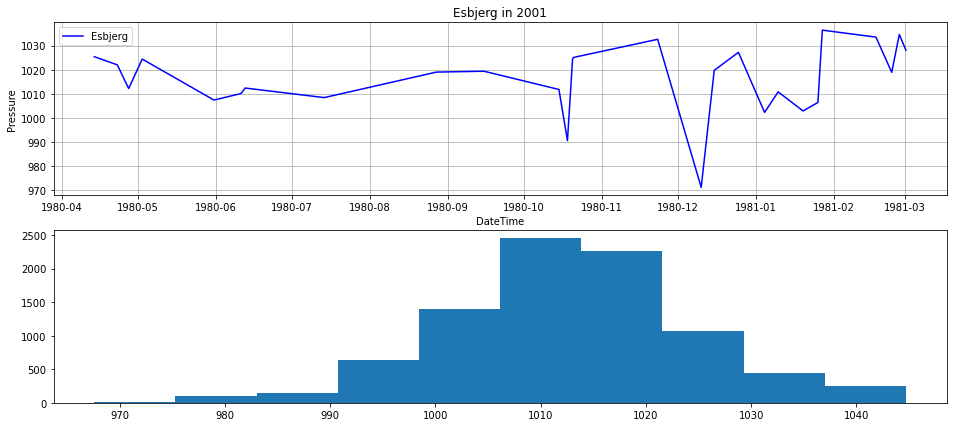

In [457]:
# [TO DO (2)] choose one year with mostly actual observations, plot it and make an histogram of the distribution

# TO BE COMPLETED

# choose 2001 as the reliable observation
plt.figure(figsize=(16, 7))
plt.subplot(2,1,1)
tr_r = pd.date_range('2001-03-01 10:00:00', periods=8760, freq='60T')
plt.plot(city_e.loc[tr_i, 'Pressure'],label='Esbjerg',linestyle='-', c='b')

plt.xlabel('DateTime')
plt.ylabel('Pressure')

#plt.ylim([-8, -2])
plt.title('Esbjerg in 2001')
plt.grid()
plt.legend()
#plt.show()

#histogram

plt.subplot(2,1,2)
plt.hist(city_e.loc[tr_r, 'Pressure'])

plt.show()
###############################################




In [458]:
#1.5.1 Imputation of missing data points

In [467]:
import zipfile
import pickle
#zipfile.ZipFile('./weather_Esbjerg_imputed.zip.pkl', mode="r").extractall('./')

with open('weather_Esbjerg_imputed.zip.pkl', 'rb') as f:
    datadict = pickle.load(f, encoding='latin1')
    
df_Esbjerg_imputed = datadict
df_Esbjerg_imputed


,Temp,Pressure,WindSpeed,WindDir
DateTime,,,,
1980-03-01 10:00:00,11.709194,1011.770780,3.093000,229.201618
1980-03-01 11:00:00,6.083333,1020.934429,12.383333,310.000000
1980-03-01 12:00:00,6.583333,1007.449232,12.883333,310.000000
1980-03-01 13:00:00,6.888889,1013.774090,13.244444,309.444444
1980-03-01 14:00:00,6.222222,1014.388389,12.911111,306.111111
...,...,...,...,...
2018-03-01 19:00:00,-5.000000,1022.600000,6.366667,70.000000
2018-03-01 20:00:00,-4.333333,1022.600000,6.866667,80.000000
2018-03-01 21:00:00,-5.000000,1022.600000,8.200000,80.000000


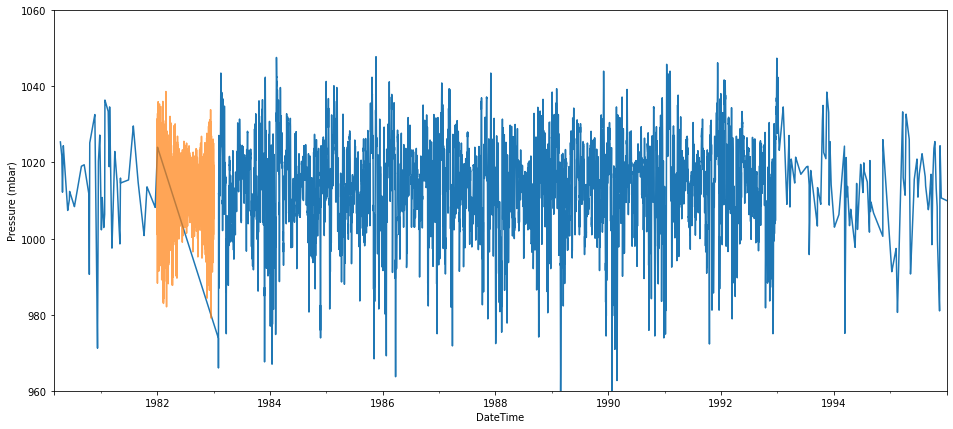

In [468]:
plt.figure(figsize=(16, 7))
df_resampled['Esbjerg'].loc['1980-03-01 10:00:00':'1995-12-31 23:00:00','Pressure'].plot()
df_Esbjerg_imputed.loc['1982-01-01 00:00:00':'1982-12-31 23:00:00','Pressure'].plot(alpha=0.7)

plt.ylim([960, 1060])
plt.ylabel('Pressure (mbar)')
plt.show()